In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mixed_Dataset.csv')

In [3]:
df.head()

,PlasticType,wavelength1,wavelength2,wavelength3,wavelength4,wavelength5,wavelength6,wavelength7,wavelength8,wavelength9,wavelength10,wavelength11
0,2,739402.0,337455.0,419472.0,318053.0,389461.0,179100.0,-1545.950000,820.17,-676.126667,714.08,-2103.61
1,2,739402.0,337455.0,419472.0,318053.0,389461.0,179100.0,-1545.950000,820.17,-676.126667,714.08,-2103.61
2,2,744313.0,341199.0,423140.0,320050.0,387348.0,176584.0,-1550.438462,819.41,-687.266667,672.98,-2107.64
3,2,784628.0,359651.0,443978.0,332802.0,401487.0,181534.0,-1634.526923,843.27,-741.173333,686.85,-2199.53
4,2,796445.0,366537.0,457434.0,346541.0,415332.0,185546.0,-1653.492308,908.97,-739.286667,687.91,-2297.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PlasticType   150 non-null    int64  
 1   wavelength1   150 non-null    float64
 2   wavelength2   150 non-null    float64
 3   wavelength3   150 non-null    float64
 4   wavelength4   150 non-null    float64
 5   wavelength5   150 non-null    float64
 6   wavelength6   150 non-null    float64
 7   wavelength7   150 non-null    float64
 8   wavelength8   150 non-null    float64
 9   wavelength9   150 non-null    float64
 10  wavelength10  150 non-null    float64
 11  wavelength11  150 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.2 KB


In [5]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

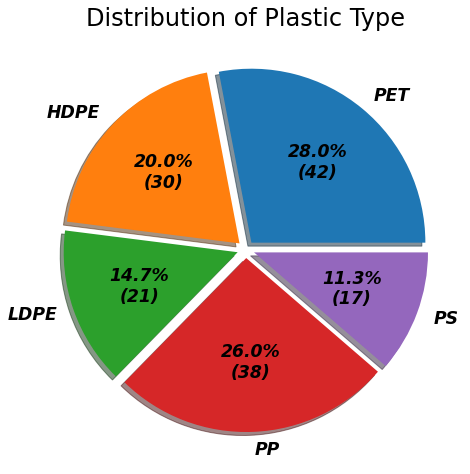

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))
PlasticType = df.PlasticType.value_counts().sort_index()
ax.pie(PlasticType.values, labels = ['PET', 'HDPE', 'LDPE', 'PP', 'PS'], explode=[0.05, 0.05, 0.05, 0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, PlasticType.values),
       textprops = {'family':'sans-serif', 'fontsize':'xx-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Plastic Type', size = 24)
# plt.legend(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], loc = 'lower right', prop={'size': 16})
plt.show()

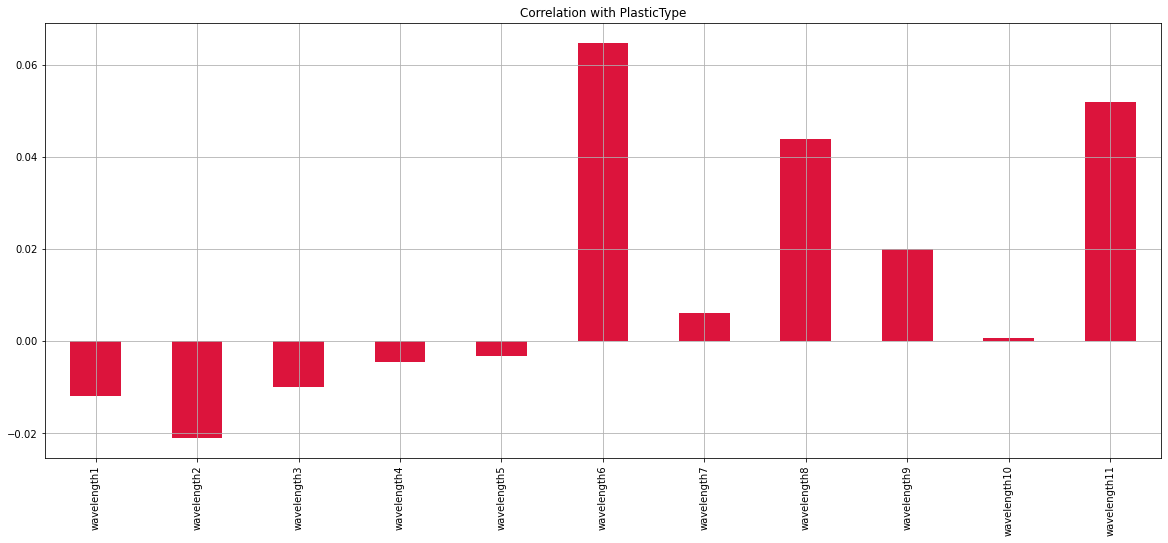

In [7]:
df.drop('PlasticType', axis = 1).corrwith(df.PlasticType).plot(kind = 'bar', grid=True, figsize=(20, 8),
                                                                 title = "Correlation with PlasticType", color = "crimson");

In [8]:
# Assigning independent values to array X, and dependant values to array y
X = df.drop('PlasticType', axis = 1).iloc[:, :].values
y = df.iloc[:, 0].values

In [9]:
X.shape, y.shape

((150, 11), (150,))

In [10]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# Applying feature scaling to independent values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression Model

In [12]:
# Training the Logistic Regression Model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [1 1]
 [1 1]
 [5 5]
 [4 5]
 [1 1]
 [6 6]
 [1 6]
 [5 5]
 [1 1]
 [5 5]
 [2 5]
 [1 1]
 [5 5]
 [2 2]
 [4 4]
 [4 6]
 [2 5]
 [5 5]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [1 1]
 [5 1]
 [5 1]
 [2 2]
 [6 6]]


In [14]:
# Evaluating the model Performance on the training set
lrtrain = classifier.score(X_train , y_train)
lrtrain

0.9083333333333333

In [15]:
# Evaluating the model Performance on the test set
lrtest = classifier.score(X_test , y_test)
lrtest

0.7666666666666667

In [16]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[6 0 0 2 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 2 1 5 0]
 [1 0 1 0 2]]
              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.71      1.00      0.83         5
           4       0.71      1.00      0.83         5
           5       0.71      0.62      0.67         8
           6       1.00      0.50      0.67         4

    accuracy                           0.77        30
   macro avg       0.80      0.78      0.76        30
weighted avg       0.79      0.77      0.76        30

Train Accuracy: 90.83333333333333%
Test Accuracy: 76.66666666666667%


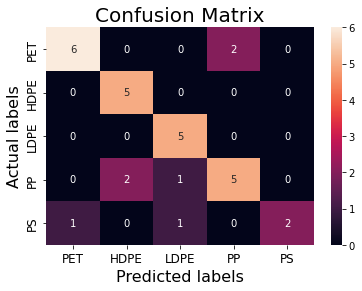

In [17]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

# K Nearest Neighbors Classifier Model

In [18]:
# Training the K Nearest Neighbors Classifier Model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [19]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [1 1]
 [1 1]
 [2 5]
 [5 5]
 [1 1]
 [6 6]
 [1 6]
 [5 5]
 [1 1]
 [5 5]
 [2 5]
 [1 1]
 [5 5]
 [2 2]
 [4 4]
 [6 6]
 [2 5]
 [5 5]
 [5 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [1 1]
 [2 1]
 [2 1]
 [2 2]
 [6 6]]


In [20]:
# Evaluating the model Performance on the training set
knntrain = classifier.score(X_train , y_train)
knntrain

0.9333333333333333

In [21]:
# Evaluating the model Performance on the test set
knntest = classifier.score(X_test , y_test)
knntest

0.7666666666666667

In [22]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[6 2 0 0 0]
 [0 4 0 1 0]
 [0 0 5 0 0]
 [0 3 0 5 0]
 [1 0 0 0 3]]
              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.44      0.80      0.57         5
           4       1.00      1.00      1.00         5
           5       0.83      0.62      0.71         8
           6       1.00      0.75      0.86         4

    accuracy                           0.77        30
   macro avg       0.83      0.78      0.79        30
weighted avg       0.82      0.77      0.78        30

Train Accuracy: 93.33333333333333%
Test Accuracy: 76.66666666666667%


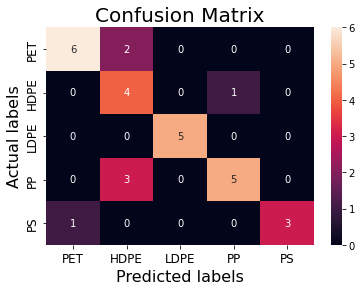

In [23]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

# Support Vector Machine Classifier Model

### * Linear Kernal

In [24]:
# Training the Support Vector Machine Classifier Model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [25]:
# Evaluating the model Performance on the training set
svmtrain = classifier.score(X_train , y_train)
svmtrain

0.9083333333333333

In [26]:
# Evaluating the model Performance on the test set
svmtest = classifier.score(X_test , y_test)
svmtest

0.8

In [27]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[7 0 0 1 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 2 1 5 0]
 [1 0 1 0 2]]
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.71      1.00      0.83         5
           4       0.71      1.00      0.83         5
           5       0.83      0.62      0.71         8
           6       1.00      0.50      0.67         4

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.78        30
weighted avg       0.83      0.80      0.79        30

Train Accuracy: 90.83333333333333%
Test Accuracy: 80.0%


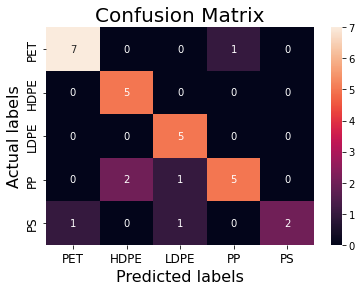

In [28]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

### * Polynomial Kernal

In [29]:
# Training the Support Vector Machine Classifier Model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [30]:
# Evaluating the model Performance on the training set
svmtrain = classifier.score(X_train , y_train)
svmtrain

0.6666666666666666

In [31]:
# Evaluating the model Performance on the test set
svmtest = classifier.score(X_test , y_test)
svmtest

0.6

In [32]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[7 0 0 1 0]
 [0 2 0 3 0]
 [5 0 0 0 0]
 [1 0 0 7 0]
 [2 0 0 0 2]]
              precision    recall  f1-score   support

           1       0.47      0.88      0.61         8
           2       1.00      0.40      0.57         5
           4       0.00      0.00      0.00         5
           5       0.64      0.88      0.74         8
           6       1.00      0.50      0.67         4

    accuracy                           0.60        30
   macro avg       0.62      0.53      0.52        30
weighted avg       0.59      0.60      0.54        30

Train Accuracy: 66.66666666666666%
Test Accuracy: 60.0%


C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


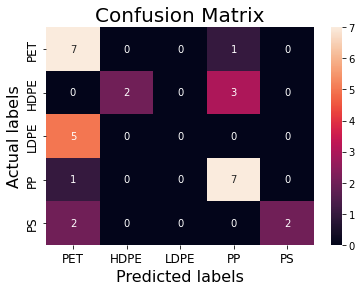

In [33]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

### * RBF Kernal

In [34]:
# Training the Support Vector Machine Classifier Model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [35]:
# Evaluating the model Performance on the training set
svmtrain = classifier.score(X_train , y_train)
svmtrain

0.5833333333333334

In [36]:
# Evaluating the model Performance on the test set
svmtest = classifier.score(X_test , y_test)
svmtest

0.4666666666666667

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[6 1 0 1 0]
 [0 4 0 1 0]
 [5 0 0 0 0]
 [1 5 0 2 0]
 [2 0 0 0 2]]
              precision    recall  f1-score   support

           1       0.43      0.75      0.55         8
           2       0.40      0.80      0.53         5
           4       0.00      0.00      0.00         5
           5       0.50      0.25      0.33         8
           6       1.00      0.50      0.67         4

    accuracy                           0.47        30
   macro avg       0.47      0.46      0.42        30
weighted avg       0.45      0.47      0.41        30

Train Accuracy: 58.333333333333336%
Test Accuracy: 46.666666666666664%


C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


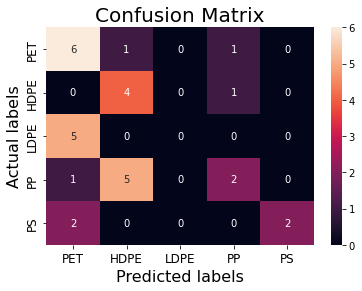

In [38]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

### * Sigmoid Kernal

In [39]:
# Training the Support Vector Machine Classifier Model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [40]:
# Evaluating the model Performance on the training set
svmtrain = classifier.score(X_train , y_train)
svmtrain

0.4166666666666667

In [41]:
# Evaluating the model Performance on the test set
svmtest = classifier.score(X_test , y_test)
svmtest

0.36666666666666664

In [42]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[7 1 0 0 0]
 [1 4 0 0 0]
 [5 0 0 0 0]
 [5 3 0 0 0]
 [4 0 0 0 0]]
              precision    recall  f1-score   support

           1       0.32      0.88      0.47         8
           2       0.50      0.80      0.62         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         4

    accuracy                           0.37        30
   macro avg       0.16      0.34      0.22        30
weighted avg       0.17      0.37      0.23        30

Train Accuracy: 41.66666666666667%
Test Accuracy: 36.666666666666664%


C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MohamedMady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


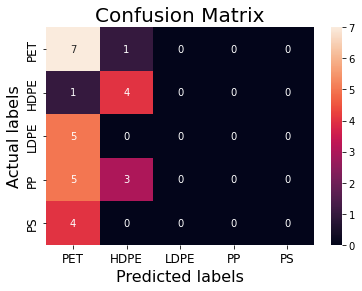

In [43]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

# Naive Bayes Classifier Model

In [44]:
# Training the Naive Bayes Classifier Model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
# Evaluating the model Performance on the training set
nbtrain = classifier.score(X_train , y_train)
nbtrain

0.6

In [46]:
# Evaluating the model Performance on the test set
nbtest = classifier.score(X_test , y_test)
nbtest

0.6

In [47]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[5 3 0 0 0]
 [0 4 0 1 0]
 [0 0 5 0 0]
 [1 4 0 2 1]
 [1 0 1 0 2]]
              precision    recall  f1-score   support

           1       0.71      0.62      0.67         8
           2       0.36      0.80      0.50         5
           4       0.83      1.00      0.91         5
           5       0.67      0.25      0.36         8
           6       0.67      0.50      0.57         4

    accuracy                           0.60        30
   macro avg       0.65      0.64      0.60        30
weighted avg       0.66      0.60      0.59        30

Train Accuracy: 60.0%
Test Accuracy: 60.0%


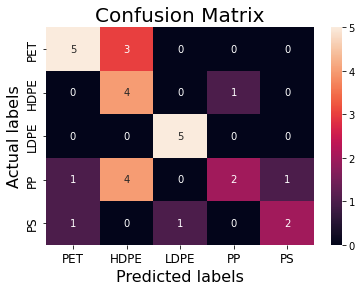

In [48]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

# Decision Tree Classifier Model

In [49]:
# Training the Decision Tree Classifier Model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [6 1]
 [1 1]
 [2 5]
 [6 5]
 [6 1]
 [6 6]
 [5 6]
 [5 5]
 [1 1]
 [5 5]
 [5 5]
 [1 1]
 [5 5]
 [2 2]
 [4 4]
 [6 6]
 [1 5]
 [5 5]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [1 1]
 [5 1]
 [5 1]
 [2 2]
 [6 6]]


In [51]:
# Evaluating the model Performance on the training set
dttrain = classifier.score(X_train , y_train)
dttrain

1.0

In [52]:
# Evaluating the model Performance on the test set
dttest = classifier.score(X_test , y_test)
dttest

0.7333333333333333

In [53]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[4 0 0 2 2]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [1 1 0 5 1]
 [0 0 0 1 3]]
              precision    recall  f1-score   support

           1       0.80      0.50      0.62         8
           2       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      0.62      0.62         8
           6       0.50      0.75      0.60         4

    accuracy                           0.73        30
   macro avg       0.75      0.78      0.75        30
weighted avg       0.75      0.73      0.73        30

Train Accuracy: 100.0%
Test Accuracy: 73.33333333333333%


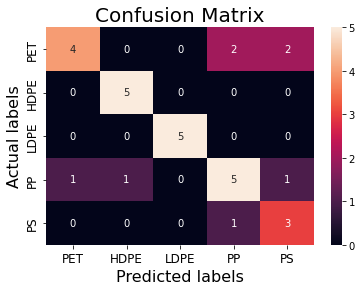

In [54]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);

# Random Forest Cassifier Model

In [55]:
# Training the Random Forest Cassifier Model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [56]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [1 1]
 [1 1]
 [2 5]
 [4 5]
 [1 1]
 [6 6]
 [5 6]
 [5 5]
 [1 1]
 [5 5]
 [2 5]
 [1 1]
 [5 5]
 [2 2]
 [4 4]
 [6 6]
 [2 5]
 [5 5]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [1 1]
 [2 1]
 [1 1]
 [2 2]
 [6 6]]


In [57]:
# Evaluating the model Performance on the training set
rftrain = classifier.score(X_train , y_train)
rftrain

0.9916666666666667

In [58]:
# Evaluating the model Performance on the test set
rftest = classifier.score(X_test , y_test)
rftest

0.8

In [59]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

[[7 1 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 3 1 4 0]
 [0 0 0 1 3]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.56      1.00      0.71         5
           4       0.83      1.00      0.91         5
           5       0.80      0.50      0.62         8
           6       1.00      0.75      0.86         4

    accuracy                           0.80        30
   macro avg       0.84      0.82      0.81        30
weighted avg       0.84      0.80      0.80        30

Train Accuracy: 99.16666666666667%
Test Accuracy: 80.0%


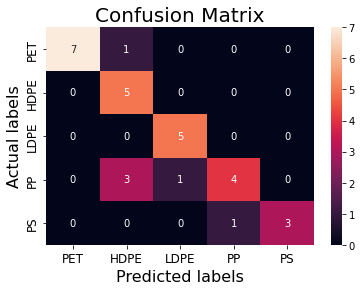

In [60]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16);
ax.xaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);
ax.yaxis.set_ticklabels(['PET', 'HDPE', 'LDPE', 'PP', 'PS'], size = 12);